# Projeto 2 - Ciência dos Dados

______________________________________________________

## Participantes:


Henrique Andrade Albuqurque 


Mateus Marinheiro 


Matheus Constante

________________________________________

## Introdução

### Tema:

      Uma empresa junior está procurando por jovens, formados na escola que possuem o raciocínio logíco desenvolvido, além de possuirem um bom compreendimento das matérias de exatas. Desse modo, a firma possui a intenção de projetar um classificdor que preve a nota do enem de matemática de alunos, baseados em algumas características importantes para a firma. 
      
      A firma deseja contratar um novo grupo de trainees que poussuam diferentes experiencias e culturas, para assim obter no conjunto uma grande de variação de aprendizados gerais. Devido a isso, o classificador deve prever as notas de matemáticas de pessoas baseadas nas seguinte features: que sejam treineiros ou não, para ficar de olho em futuros membros; na faixa etária, pois a empresa está visando contratar jovens entre 18 e 25 anos para possuir diferentes visões de mundo, entretando não é uma obrigação ser menor que 25 anos; no sexo da pessoas para possuir um grupo misto que também possua a visão entre diferentes gêneros, e que incentive as mulheres a virem para a área de exatas; na raça, para haver uma diferença de culturas dentro do grupo, e visões sobre o preconceito no mundo atual; e por último no tipo de escola que a pessoas frenquentou, pois existe uma grande variação das experiências obtidas pelos alunos de escolas públicas e privadas.

   

### Target:
 
 - NU_NOTA_MT:
   Notas de matemática do Enem de cada participante.


### Features: 

 - TP_FAIXA_ETARIA:
   - Faixa Etária dos participantes
      - 1- Menor de 17 anos
      - 2- 17 anos
      - 3- 18 anos
      - 4- 19 anos
      - 5- 20 anos
      - 6- 21 anos
      - 7- 22 anos
      - 8- 23 anos
      - 9- 24 anos
      - 10- 25 anos
      - 11- Entre 26 e 30 anos
      - 12- Entre 31 e 35 anos
      - 13- Entre 36 e 40 anos
      - 14- Entre 41 e 45 anos
      - 15- Entre 46 e 50 anos
      - 16- Entre 51 e 55 anos
      - 17- Entre 56 e 60 anos
      - 18- Entre 61 e 65 anos
      - 19- Entre 66 e 70 anos
      - 20- Maior de 70 anos

 - TP_SEXO: 
    - Sexo do Participante
      - M - Masculino
      - F - Feminino
 - TP_COR_RAÇA:
    - Cor/Raça do participante
      - 0- Não declarado
      - 1- Branca
      - 2- Preta
      - 3- Parda
      - 4- Amarela
      - 5- Indígina
      - 6- Não dispõe da informação
 - IN_TREINEIRO:
    - Indica se o inscrito fez a prova com intuito de apenas treinar seus conhecimentos
      - 0 - Sim
      - 1 - Não
 - TP_ESCOLA:
    - Tipo de escola do Ensino Médio:
       - 1- Não respondeu
       - 2- Pública
       - 3- Privada

________

## Minerando Dados e Características do Dataset:

Carregando algumas bibliotecas:

In [145]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

Carregando a base de dados:

In [146]:
dados = pd.read_excel('DADOS\MICRODADOS_ENEM_2022.xlsx') # Lê o arquivo excel
dados.head()

,TP_FAIXA_ETARIA,TP_SEXO,TP_COR_RACA,TP_ESCOLA,IN_TREINEIRO,TP_LOCALIZACAO_ESC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
0,14,M,2,1,0,NaN,NaN,NaN,NaN,NaN,NaN
1,14,M,1,1,0,NaN,NaN,NaN,NaN,NaN,NaN
2,5,F,2,1,0,NaN,421.1,546.0,498.8,565.3,760.0
3,6,M,3,1,0,NaN,490.7,388.6,357.8,416.0,320.0
4,4,M,3,1,0,NaN,NaN,NaN,NaN,NaN,NaN


Separando colunas de Target e Features:

In [147]:
dados = dados.loc[:, ["TP_FAIXA_ETARIA", "TP_SEXO", "TP_COR_RACA", "TP_ESCOLA", "IN_TREINEIRO", "NU_NOTA_MT"]] # Seleciona as colunas que serão utilizadas como features
dados.head()

,TP_FAIXA_ETARIA,TP_SEXO,TP_COR_RACA,TP_ESCOLA,IN_TREINEIRO,NU_NOTA_MT
0,14,M,2,1,0,NaN
1,14,M,1,1,0,NaN
2,5,F,2,1,0,565.3
3,6,M,3,1,0,416.0
4,4,M,3,1,0,NaN


Retirando Linhas vazias da coluna Target

In [148]:
# Remover as linhas com NaN apenas na coluna 'NU_NOTA_MT'
dados = dados.dropna(subset=['NU_NOTA_MT'])
dados = dados.loc[dados['NU_NOTA_MT'] != 0] # Remover as linhas com nota 0
dados.head(5)


,TP_FAIXA_ETARIA,TP_SEXO,TP_COR_RACA,TP_ESCOLA,IN_TREINEIRO,NU_NOTA_MT
2,5,F,2,1,0,565.3
3,6,M,3,1,0,416.0
7,6,F,2,1,0,404.9
9,4,F,3,1,0,435.3
11,2,F,1,3,0,456.8


### Classificando variáveis genéricas

Vemos que em nossa base de dados, as variáveis não estão identificadas com seus rótulos verdadeiros, mas sim em genéricos, portanto, para simplificar a compreensão e interpretação, mudamos os rótulos de todas as colunas qualitatiivas. 

In [149]:
# Mudando o nome das variáveis da coluna TP_FAIXA_ETARIA

novas_categorias = {1 : '< 17', 2 : '17', 2 : '18', 3 : '19', 4 : '20', 5 : '21', 6 : '22', 7 : '23', 8 : '24', 9 : '25', 10 : '26-30', 11 : '31-35', 12 : '36-40', 13 : '41-45', 14 : '46-50', 15 : '51-55', 16 : '56-60', 17 : '61-65', 18 : '66-70', 19 : '71-75', 20 : '70 >'}
dados['TP_FAIXA_ETARIA'] = dados['TP_FAIXA_ETARIA'].astype('category').cat.rename_categories(novas_categorias)

# Muda o nome das variáveis da coluna TP_COR_RACA]

novas_categorias = {0 : 'Não declarado', 1 : 'Branca', 2 : 'Preta', 3 : 'Parda', 4 : 'Amarela', 5 : 'Indígena', 6 : 'Não dispõe da informação'}
dados['TP_COR_RACA'] = dados['TP_COR_RACA'].astype('category').cat.rename_categories(novas_categorias)

# Muda o nome das variáveis da coluna TP_ESCOLA

novas_categorias = {1 : 'Não respondeu', 2 : 'Pública', 3 : 'Privada'}
dados['TP_ESCOLA'] = dados['TP_ESCOLA'].astype('category').cat.rename_categories(novas_categorias)

# Muda o nome das variáveis da coluna IN_TREINEIRO

novas_categorias = {0 : 'Sim', 1 : 'Não'}
dados['IN_TREINEIRO'] = dados['IN_TREINEIRO'].astype('category').cat.rename_categories(novas_categorias)

# Muda o nome das variáveis da coluna TP_SEXO

novas_categorias = {'M' : 'Masculino', 'F' : 'Feminino'}
dados['TP_SEXO'] = dados['TP_SEXO'].astype('category').cat.rename_categories(novas_categorias)



#### Análise descritiva detalhada das variáveis


- Faixa Etária x Notas de Matemática

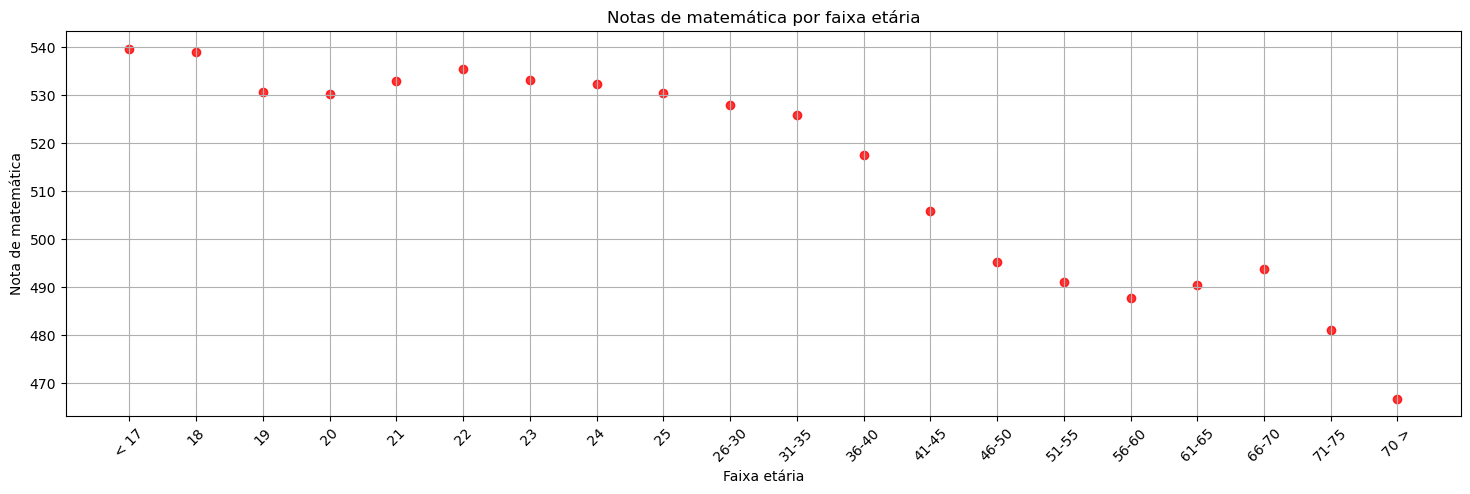

In [179]:
import numpy as np
import matplotlib.pyplot as plt

# Supondo que 'dados' seja o DataFrame que contém suas notas e faixas etárias

# Médias das notas de matemática por faixa etária
y = dados.groupby(['TP_FAIXA_ETARIA']).NU_NOTA_MT.mean()

# Criando um array com os índices para o eixo x
x = np.arange(len(y))

# Gráfico de dispersão das notas de matemática por faixa etária
fig = plt.figure(figsize=(18, 5))
plt.scatter(x, y, c='red', alpha=0.8)

# Configurando os ticks do eixo x
plt.xticks(x, labels=y.index, rotation=45)

plt.title('Notas de matemática por faixa etária')
plt.xlabel('Faixa etária')
plt.ylabel('Nota de matemática')
plt.grid(True)
plt.show()


- Gráfico da média de notas por faixa etária

O gráfico acima ilustra a média das notas em relação às diferentes faixas etárias. Optamos por esse formato de gráfico com médias, uma vez que a inclusão de todas as notas tornaria a representação demasiadamente poluída. Quanto ao uso de um histograma, devido à quantidade significativa de dados (20 conjuntos), poderia gerar certa confusão na interpretação.

É possível observar uma influência da faixa etária nas notas de Matemática. Essa influência não é integral, porém evidencia-se que, em média, as notas tendem a diminuir conforme a faixa etária aumenta.

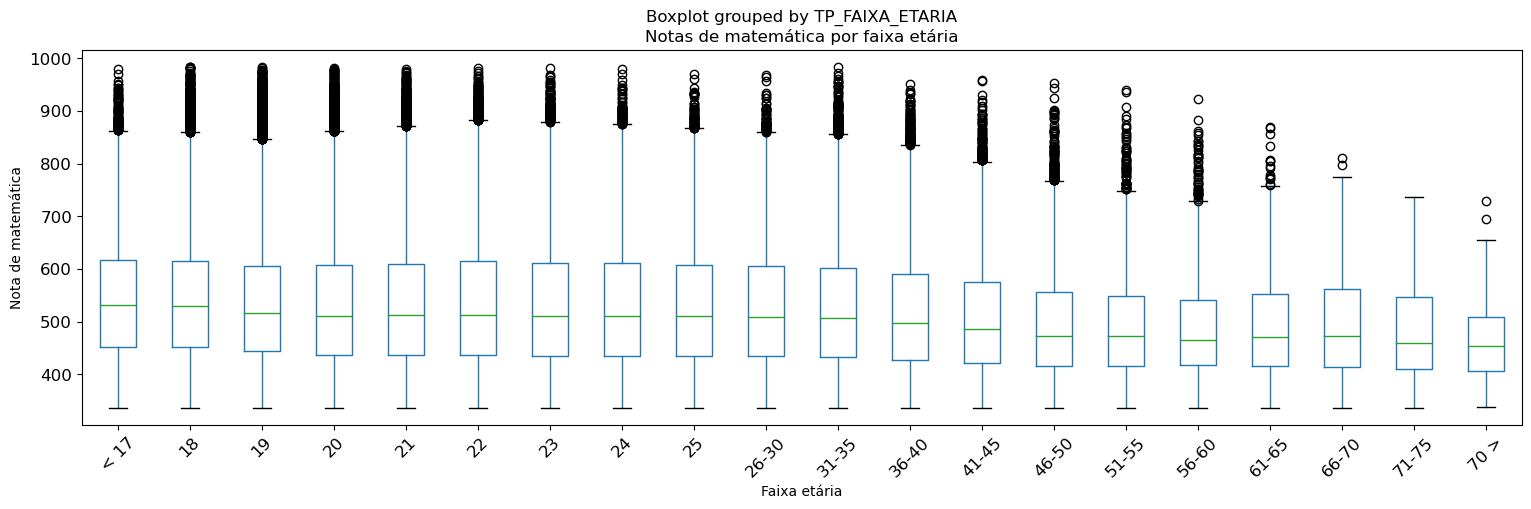

In [151]:
dados.boxplot(column='NU_NOTA_MT', by='TP_FAIXA_ETARIA', figsize=(18, 5), grid=False, fontsize=12, rot=45)
plt.title('Notas de matemática por faixa etária')
plt.xlabel('Faixa etária')
plt.ylabel('Nota de matemática')
plt.show()



- Gráfico boxplot notas de matemática por faixa etária

O gráfico boxplot mostra as notas de matemática em diferentes faixas etárias. Ele indica que, em geral, à medida que os alunos ficam mais velhos, suas notas tendem a diminuir. Além disso, os "retângulos" no gráfico (representando os quartis) se tornam menores à medida que a idade aumenta, sugerindo que a variação nas notas é menor em idades mais altas. Isso significa que as notas dos alunos nesses grupos de idade são mais consistentes, com menos diferenças entre elas, em comparação com os grupos mais jovens.

- Sexo x Nota de Matemática

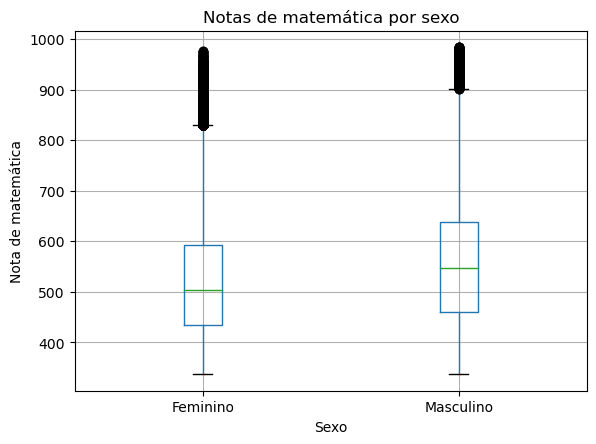

In [152]:
# Boxplot das notas de matemática por sexo sem outliers
dados.boxplot(column='NU_NOTA_MT', by='TP_SEXO')
plt.title('Notas de matemática por sexo')
plt.suptitle('')
plt.xlabel('Sexo')
plt.ylabel('Nota de matemática')
plt.show()



- Gráfico notas de matemática por sexo

Ao interpretar o gráfico boxplot das notas de Matemática, observamos que o grupo masculino apresenta uma caixa mais alta e uma mediana mais elevada em relação ao grupo feminino. Isso sugere que, em média, os homens tendem a ter um desempenho superior nessa disciplina quando comparados com as mulheres. Essas diferenças são indicadas pela posição mais alta da mediana e da própria caixa no gráfico, denotando um desempenho médio mais elevado no grupo masculino em relação ao grupo feminino no contexto das notas de Matemática.

- Cor/Raça x Notas de Matemática

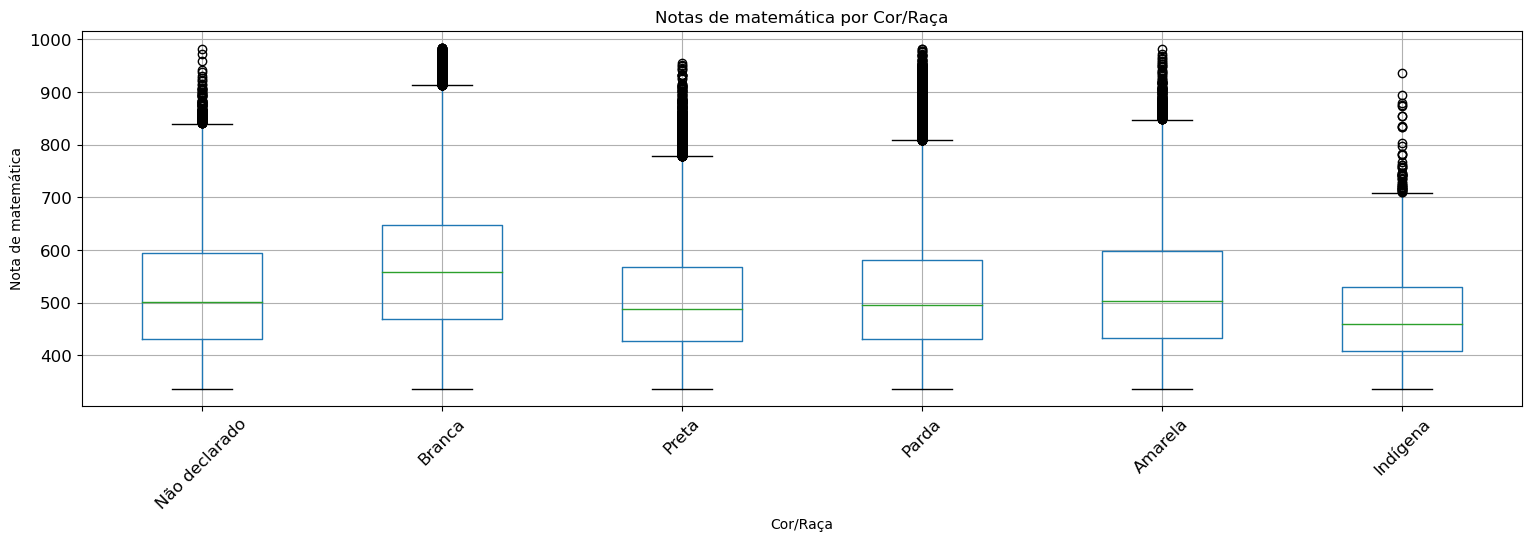

In [153]:
# Boxplot das notas de matemática por sexo sem outliers
dados.boxplot(column='NU_NOTA_MT', by='TP_COR_RACA', figsize=(18, 5), grid=False, fontsize=12, rot=45)
plt.title('Notas de matemática por Cor/Raça')
plt.suptitle('')
plt.xlabel('Cor/Raça')
plt.ylabel('Nota de matemática')
plt.grid()
plt.show()



- Gráfico notas de matemática por cor/raça 

Branca: Esta raça/cor possui a maior mediana, evidenciada pelo quadrado mais alto no gráfico, indicando um desempenho superior em relação às outras categorias.

Amarelos e Não Declarados: Apresentam uma mediana intermediária, ficando em segundo lugar no desempenho acadêmico em comparação com os brancos. Embora não alcancem a média mais alta, estão acima das outras categorias.

Pretos e Pardos: Essas raças/cores ficam em terceiro lugar em termos de mediana, indicando um desempenho menor em comparação com brancos, amarelos e não declarados.

Indígenas: Apresentam a menor mediana dentre todas as raças/cores analisadas, sugerindo um desempenho acadêmico mais baixo em relação às outras categorias mencionadas no gráfico Box Plot.

Essa análise das mediana das raças/cores evidencia uma disparidade nos resultados acadêmicos, sugerindo diferenças de desempenho entre os grupos. É importante notar que a interpretação desses dados deve ser feita com cautela, considerando fatores sociais, econômicos e estruturais que podem influenciar esses resultados.

 - Tipo de Escola x Nota de Matemática

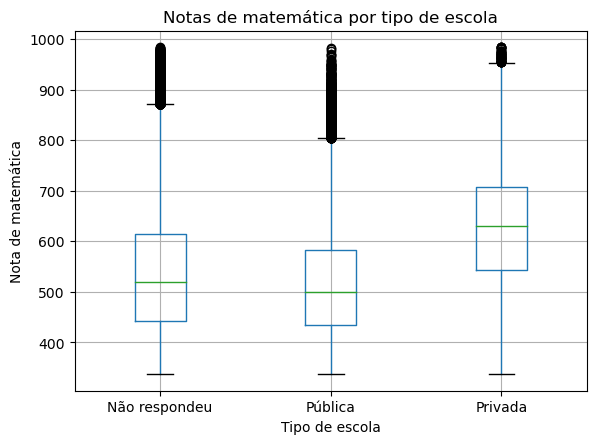

In [154]:
# box plot das notas de matemática por tipo de escola
dados.boxplot(column='NU_NOTA_MT', by='TP_ESCOLA')
plt.title('Notas de matemática por tipo de escola')
plt.suptitle('')
plt.xlabel('Tipo de escola')
plt.ylabel('Nota de matemática')
plt.show()


- Gráfico boxplot notas de matemática por tipo de escola

Escola Privada: Apresenta um desempenho muito superior em relação às outras categorias. Possui uma mediana significativamente mais alta em comparação com as demais escolas, representadas pelas pessoas que não responderam e, em especial, em relação às escolas públicas.

Pessoas que não Responderam: Possuem um desempenho intermediário em relação às diferentes categorias de escolas. No entanto, quando comparadas especificamente com o desempenho das escolas particulares, possuem um desempenho inferior e um desempenho superior as escolas publicas.

Escola Pública: Apresenta um desempenho significativamente inferior em relação às escolas privadas e em relação às pessoas que não responderam. Isso sugere que, em média, as escolas públicas têm um desempenho menor comparado as demais.

Essa análise ressalta uma disparidade no desempenho entre os tipos de escolas. É importante considerar diversos fatores, como investimento, estrutura educacional, qualidade de ensino e recursos disponíveis em cada tipo de instituição, ao interpretar esses dados.

 - Treineiro/Não treineiro x Nota de Matemática

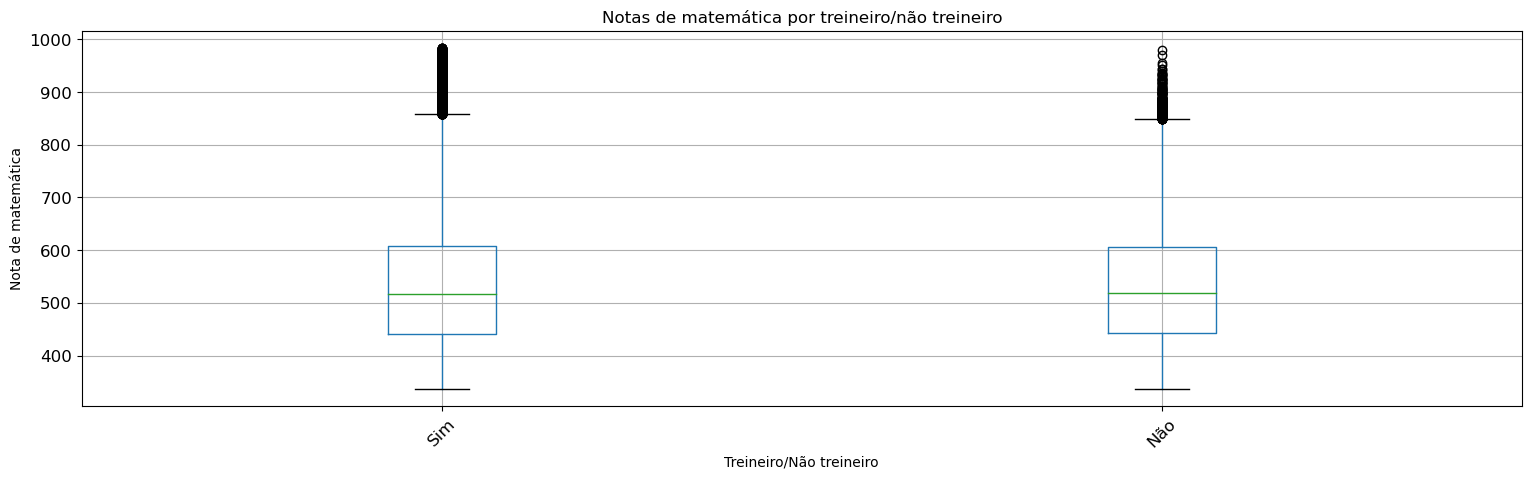

In [155]:
# box plot das notas de matemática por treineiro/nao treineiro

dados.boxplot(column='NU_NOTA_MT', by='IN_TREINEIRO', figsize=(18, 5), grid=False, fontsize=12, rot=45)
plt.title('Notas de matemática por treineiro/não treineiro')
plt.suptitle('')
plt.xlabel('Treineiro/Não treineiro')
plt.ylabel('Nota de matemática')
plt.grid()
plt.show()


Os gráficos boxplot comparativos entre treineiros e não treineiros exibem medianas quase semelhantes, bem como caixas (representando os quartis) de tamanhos e posições aproximadamente iguais, isso indica uma similaridade nos desempenhos entre os dois grupos. A ausência de diferenças marcantes na posição da mediana e na extensão dos quartis sugere que tanto os treineiros quanto os não treineiros obtiveram resultados médios semelhantes na avaliação. Isso sugere que a preparação adicional realizada pelos treineiros não resultou em um desempenho significativamente distinto em relação aos não treineiros, pois a distribuição das notas ou resultados parece ser comparável entre ambos os grupos.

## Modelos de Predição

#### - Regressão Linear Múltipla

In [156]:
# PARA DEIXAR EM GRAFICO NAO EDITAVEL
%matplotlib inline

import pandas as pd
import numpy as np
from scipy.stats import norm, probplot
import statsmodels.api as sm
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

# Para ter melhor print
from IPython.display import display

In [157]:
### Função utilitária para fazer a regressão com constante adicionada

def regress(Y,X):
    '''
    Y: coluna do DataFrame utilizada como variável resposta (TARGET)
    X: coluna(s) do DataFrame utilizadas como variável(is) explicativas (FEATURES)
    '''
    X_cp = sm.add_constant(X)
    model = sm.OLS(Y,X_cp)
    results = model.fit()
    
    return results

In [158]:
# Transformando variaveis categoricas em variaveis dummies

dados_dummies = pd.get_dummies(dados, columns=['TP_FAIXA_ETARIA', 'TP_SEXO', 'TP_COR_RACA', 'TP_ESCOLA', 'IN_TREINEIRO'], drop_first=True)
dados_dummies.head()

,NU_NOTA_MT,TP_FAIXA_ETARIA_18,TP_FAIXA_ETARIA_19,TP_FAIXA_ETARIA_20,TP_FAIXA_ETARIA_21,TP_FAIXA_ETARIA_22,TP_FAIXA_ETARIA_23,TP_FAIXA_ETARIA_24,TP_FAIXA_ETARIA_25,TP_FAIXA_ETARIA_26-30,...,TP_FAIXA_ETARIA_70 >,TP_SEXO_Masculino,TP_COR_RACA_Branca,TP_COR_RACA_Preta,TP_COR_RACA_Parda,TP_COR_RACA_Amarela,TP_COR_RACA_Indígena,TP_ESCOLA_Pública,TP_ESCOLA_Privada,IN_TREINEIRO_Não
2,565.3,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,416.0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
7,404.9,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
9,435.3,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
11,456.8,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [159]:
# Descrição das variáveis

dados_dummies.describe()

,NU_NOTA_MT,TP_FAIXA_ETARIA_18,TP_FAIXA_ETARIA_19,TP_FAIXA_ETARIA_20,TP_FAIXA_ETARIA_21,TP_FAIXA_ETARIA_22,TP_FAIXA_ETARIA_23,TP_FAIXA_ETARIA_24,TP_FAIXA_ETARIA_25,TP_FAIXA_ETARIA_26-30,...,TP_FAIXA_ETARIA_70 >,TP_SEXO_Masculino,TP_COR_RACA_Branca,TP_COR_RACA_Preta,TP_COR_RACA_Parda,TP_COR_RACA_Amarela,TP_COR_RACA_Indígena,TP_ESCOLA_Pública,TP_ESCOLA_Privada,IN_TREINEIRO_Não
count,742684.000000,742684.000000,742684.000000,742684.000000,742684.000000,742684.000000,742684.000000,742684.000000,742684.000000,742684.000000,...,742684.000000,742684.000000,742684.00000,742684.000000,742684.000000,742684.000000,742684.000000,742684.000000,742684.000000,742684.000000
mean,532.015934,0.233312,0.281179,0.131519,0.073610,0.045674,0.030725,0.021869,0.015845,0.013181,...,0.000092,0.328810,0.38621,0.122568,0.449343,0.018895,0.005310,0.393660,0.056377,0.107879
std,113.380250,0.422939,0.449575,0.337967,0.261135,0.208776,0.172572,0.146257,0.124877,0.114048,...,0.009568,0.469781,0.48688,0.327940,0.497428,0.136154,0.072679,0.488561,0.230648,0.310228
min,336.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,441.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,516.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,608.100000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.00000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,983.900000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<div id="passo1"></div>

### Passo 1: Ajustando o modelo

Ajuste um modelo considerando Média de Matemática como resposta (dependente) e as demais variáveis da base de dados como explicativas!

Faça a separação das variáveis resposta e preditoras (explicativas):

Retirando colunas de faixa etária maior do que 30.

In [160]:
dados_dummies.columns

Index(['NU_NOTA_MT', 'TP_FAIXA_ETARIA_18', 'TP_FAIXA_ETARIA_19',
       'TP_FAIXA_ETARIA_20', 'TP_FAIXA_ETARIA_21', 'TP_FAIXA_ETARIA_22',
       'TP_FAIXA_ETARIA_23', 'TP_FAIXA_ETARIA_24', 'TP_FAIXA_ETARIA_25',
       'TP_FAIXA_ETARIA_26-30', 'TP_FAIXA_ETARIA_31-35',
       'TP_FAIXA_ETARIA_36-40', 'TP_FAIXA_ETARIA_41-45',
       'TP_FAIXA_ETARIA_46-50', 'TP_FAIXA_ETARIA_51-55',
       'TP_FAIXA_ETARIA_56-60', 'TP_FAIXA_ETARIA_61-65',
       'TP_FAIXA_ETARIA_66-70', 'TP_FAIXA_ETARIA_71-75',
       'TP_FAIXA_ETARIA_70 >', 'TP_SEXO_Masculino', 'TP_COR_RACA_Branca',
       'TP_COR_RACA_Preta', 'TP_COR_RACA_Parda', 'TP_COR_RACA_Amarela',
       'TP_COR_RACA_Indígena', 'TP_ESCOLA_Pública', 'TP_ESCOLA_Privada',
       'IN_TREINEIRO_Não'],
      dtype='object')

In [161]:
# Retirando todas as coluna de faixa etária 30 >

# Lista das faixas etárias que você quer manter
faixas_etarias_a_manter = ['NU_NOTA_MT', 'TP_FAIXA_ETARIA_18', 'TP_FAIXA_ETARIA_19',
       'TP_FAIXA_ETARIA_20', 'TP_FAIXA_ETARIA_21', 'TP_FAIXA_ETARIA_22',
       'TP_FAIXA_ETARIA_23', 'TP_FAIXA_ETARIA_24', 'TP_FAIXA_ETARIA_25',
       'TP_FAIXA_ETARIA_26-30', 'TP_SEXO_Masculino', 'TP_COR_RACA_Branca',
       'TP_COR_RACA_Preta', 'TP_COR_RACA_Parda', 'TP_COR_RACA_Amarela',
       'TP_COR_RACA_Indígena', 'TP_ESCOLA_Pública', 'TP_ESCOLA_Privada',
       'IN_TREINEIRO_Não']

# Filtrando o DataFrame para manter apenas as colunas desejadas
dummies_filtrado = dados_dummies[faixas_etarias_a_manter]

dummies_filtrado.head()

,NU_NOTA_MT,TP_FAIXA_ETARIA_18,TP_FAIXA_ETARIA_19,TP_FAIXA_ETARIA_20,TP_FAIXA_ETARIA_21,TP_FAIXA_ETARIA_22,TP_FAIXA_ETARIA_23,TP_FAIXA_ETARIA_24,TP_FAIXA_ETARIA_25,TP_FAIXA_ETARIA_26-30,TP_SEXO_Masculino,TP_COR_RACA_Branca,TP_COR_RACA_Preta,TP_COR_RACA_Parda,TP_COR_RACA_Amarela,TP_COR_RACA_Indígena,TP_ESCOLA_Pública,TP_ESCOLA_Privada,IN_TREINEIRO_Não
2,565.3,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,416.0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0
7,404.9,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
9,435.3,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
11,456.8,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [162]:
# Separando as variáveis entre preditoras e variável resposta

X = dummies_filtrado.drop('NU_NOTA_MT', axis=1)
Y = dummies_filtrado['NU_NOTA_MT']

In [163]:
results = regress(Y, X)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             NU_NOTA_MT   R-squared:                       0.123
Model:                            OLS   Adj. R-squared:                  0.122
Method:                 Least Squares   F-statistic:                     5760.
Date:                Thu, 23 Nov 2023   Prob (F-statistic):               0.00
Time:                        15:25:24   Log-Likelihood:            -4.5187e+06
No. Observations:              742684   AIC:                         9.038e+06
Df Residuals:                  742665   BIC:                         9.038e+06
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   511.5008      0.992    515.463      0.000     509.556     513.446
TP_FAIXA_ETARIA_18       27.0792      0.481     56.259      0.000      26.136      28.023
TP_FAIXA_ETARIA_19       21.2143      0.463     45.821      0.000      20.307      22.122
TP_FAIXA_ETARIA_20        8.6653      0.490     17.687      0.000       7.705       9.626
TP_FAIXA_ETARIA_21        7.0959      0.577     12.292      0.000       5.964       8.227
TP_FAIXA_ETARIA_22        7.7263      0.680     11.367      0.000       6.394       9.058
TP_FAIXA_ETARIA_23        5.1435      0.791      6.506      0.000       3.594       6.693
TP_FAIXA_ETARIA_24        4.6134      0.909      5.077      0.000       2.832       6.394
TP_FAIXA_ETARIA_25        2.1049      1.044      2.016      0.044       0.059       4.151
TP_FAIXA_ETARIA_26-30    -0.0270      1.133     -0.024      0.981      -2.248       2.194
TP_SEXO_Masculino        37.0849      0.263    141.025      0.000      36.569      37.600
TP_COR_RACA_Branca       37.5474      0.949     39.575      0.000      35.688      39.407
TP_COR_RACA_Preta       -19.2190      0.992    -19.374      0.000     -21.163     -17.275
TP_COR_RACA_Parda        -8.8621      0.945     -9.376      0.000     -10.715      -7.010
TP_COR_RACA_Amarela       3.0058      1.290      2.330      0.020       0.478       5.534
TP_COR_RACA_Indígena    -43.8647      1.929    -22.742      0.000     -47.645     -40.084
TP_ESCOLA_Pública       -39.6317      0.374   -105.979      0.000     -40.365     -38.899
TP_ESCOLA_Privada        55.3086      0.630     87.729      0.000      54.073      56.544
IN_TREINEIRO_Não        -16.4302      0.484    -33.935      0.000     -17.379     -15.481
==============================================================================
Omnibus:                    25495.172   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            28179.674
Skew:                           0.476   Prob(JB):                         0.00
Kurtosis:                       2.927   Cond. No.                         27.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

___

<div id="passo2"></div>

### Passo 2: Verificando os resultados dos testes de hipótese

O que os valores contidos na coluna $P > |t|$ dizem a respeito das variáveis explicativas utilizadas no modelo ajustado?


A coluna $P > |t|$ obtida do comando `results.summary()` refere-se ao valor-*p* de cada variável explicativa utilizada para ajudar a compreender o comportamento da variável dependente `NU_NOTA_MT`, no caso do exemplo.

No caso da regressão múltipla obtida no exemplo, das seis variáveis explicativas, apenas duas se mostram relevantes para explicar a variável `NU_NOTA_MT` pois possui valor-*p* menor do que 10% (maior nível de significância usualmente adotado na prática).
Entretanto, como há muitas variáveis explicativas, o correto é utilizar algum método de seleção de variáveis.

Removendo a variável com maior valor-*p* desde que não significante, ou seja, desde que seja maior do que o nível de significância (nesse caso, $10\%$).
Única coluna em que não é relevante é a faixa etária de 26-30 anos, portanto iremos retirar ela da nossa base de dados.

In [164]:
# Removendo as variáveis de faixa etária entre 26 e 30 anos

X = X.drop(['TP_FAIXA_ETARIA_26-30'], axis=1)

Verificando novamente o sumário

In [165]:
# Verificando o sumário do modelo

results = regress(Y, X)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             NU_NOTA_MT   R-squared:                       0.123
Model:                            OLS   Adj. R-squared:                  0.122
Method:                 Least Squares   F-statistic:                     6099.
Date:                Thu, 23 Nov 2023   Prob (F-statistic):               0.00
Time:                        15:25:25   Log-Likelihood:            -4.5187e+06
No. Observations:              742684   AIC:                         9.038e+06
Df Residuals:                  742666   BIC:                         9.038e+06
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  511.4981      0.986    518.967      0.000     509.566     513.430
TP_FAIXA_ETARIA_18      27.0811      0.475     57.066      0.000      26.151      28.011
TP_FAIXA_ETARIA_19      21.2166      0.453     46.832      0.000      20.329      22.104
TP_FAIXA_ETARIA_20       8.6679      0.478     18.150      0.000       7.732       9.604
TP_FAIXA_ETARIA_21       7.0986      0.566     12.541      0.000       5.989       8.208
TP_FAIXA_ETARIA_22       7.7290      0.670     11.538      0.000       6.416       9.042
TP_FAIXA_ETARIA_23       5.1463      0.782      6.581      0.000       3.613       6.679
TP_FAIXA_ETARIA_24       4.6161      0.901      5.122      0.000       2.850       6.383
TP_FAIXA_ETARIA_25       2.1077      1.038      2.031      0.042       0.074       4.141
TP_SEXO_Masculino       37.0848      0.263    141.026      0.000      36.569      37.600
TP_COR_RACA_Branca      37.5474      0.949     39.575      0.000      35.688      39.407
TP_COR_RACA_Preta      -19.2191      0.992    -19.374      0.000     -21.163     -17.275
TP_COR_RACA_Parda       -8.8621      0.945     -9.376      0.000     -10.715      -7.010
TP_COR_RACA_Amarela      3.0057      1.290      2.330      0.020       0.478       5.534
TP_COR_RACA_Indígena   -43.8648      1.929    -22.742      0.000     -47.645     -40.084
TP_ESCOLA_Pública      -39.6310      0.373   -106.231      0.000     -40.362     -38.900
TP_ESCOLA_Privada       55.3093      0.630     87.831      0.000      54.075      56.544
IN_TREINEIRO_Não       -16.4284      0.478    -34.361      0.000     -17.365     -15.491
==============================================================================
Omnibus:                    25495.142   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            28179.636
Skew:                           0.476   Prob(JB):                         0.00
Kurtosis:                       2.927   Cond. No.                         27.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Ols regression results

- Para analisar o resultado acima, primeiramente devemos olhar para const que representa a média das colunas removidas pela função dummies, que são elas: 
    
Faixa Etária dos participantes: Menores de 17 anos;

Sexo do participante: Feminino;

Cor/Raça do participante: Não dispõe informação;

Indica se o inscrito fez a prova com intuito de apenas treinar seus conhecimentos: Sim;

Tipo de escola do Ensino Médio: Não respondeu ainda;

- Considerando o nosso objetivo de contratar um funcionário com o melhor desempenho em relação às nossas características específicas, após analisar os dados disponíveis acima, identificamos que o profissional ideal para essa posição deveria possuir as seguintes características:

Faixa Etária dos participantes: Quanto mais jovem melhor;

Sexo do participante: Masculino;

Cor/Raça do participante: Branco;

Indica se o inscrito fez a prova com intuito de apenas treinar seus conhecimentos: Sim;

Tipo de escola do Ensino Médio: Particular;

- Podemos ver pelo sumário que todas as variáveis são significantes para o nosso modelo.

Testando o Modelo

In [166]:
# Dividindo o dataset em treino e teste
from sklearn.model_selection import train_test_split

# Separando as variáveis entre preditoras e variável resposta
X_RLM = dummies_filtrado.drop('NU_NOTA_MT', axis=1)
Y_RLM= dummies_filtrado['NU_NOTA_MT']

from sklearn.model_selection import train_test_split

# Supondo que 'X' são suas variáveis independentes e 'y' é a variável dependente
X_RLM_train, X_RLM_test, y_RLM_train, y_RLM_test = train_test_split(X_RLM, Y_RLM, test_size=0.2, random_state=42)




In [167]:
from sklearn.linear_model import LinearRegression

# Criar um modelo de regressão linear
model_RLM = LinearRegression()

# Treinar o modelo nos dados de treinamento
model_RLM.fit(X_RLM_train, y_RLM_train)


LinearRegression()

In [168]:
# Fazer previsões em cima dos dados de teste

y_RLM_pred = model_RLM.predict(X_RLM_test)

In [169]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Exemplo de cálculo de métricas
r2 = r2_score(y_RLM_test, y_RLM_pred)
mae = mean_absolute_error(y_RLM_test, y_RLM_pred)
mse = mean_squared_error(y_RLM_test, y_RLM_pred)
rmse = np.sqrt(mse)

print(f'R²: {r2:.4f}')
print(f'MAE: {mae:.4f}')
print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')

R²: 0.1229
MAE: 86.6162
MSE: 11335.0116
RMSE: 106.4660


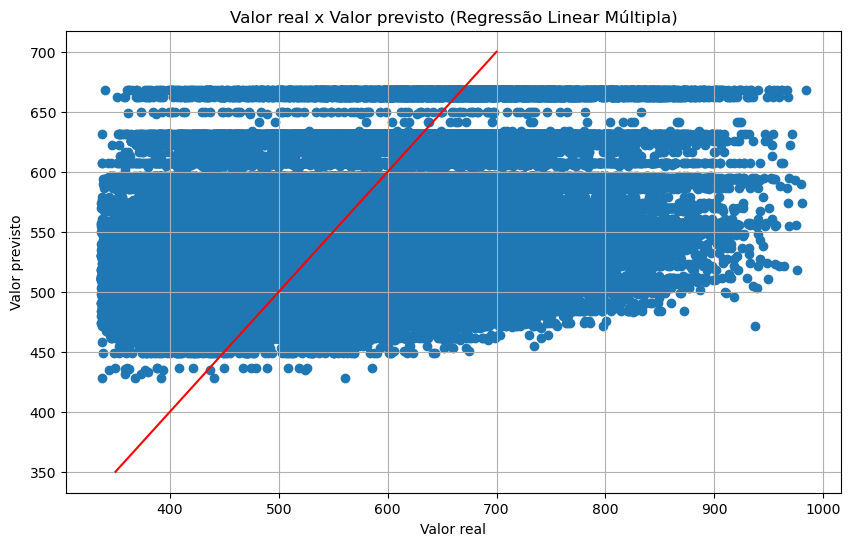

In [170]:
# grafico de dispersão entre os valores reais e os valores previstos

plt.figure(figsize=(10, 6))
plt.scatter(y_RLM_test, y_RLM_pred)
plt.xlabel('Valor real')
plt.ylabel('Valor previsto')
plt.title('Valor real x Valor previsto (Regressão Linear Múltipla)')

# Plotando a reta de regressão no gráfico de dispersão

# Criando um array com os valores mínimo e máximo de y_test
y_min = np.min(y_RLM_test)
y_max = np.max(y_RLM_test)

# Criando um array com os valores mínimo e máximo previstos

previstos_min = np.min(y_RLM_pred)
previstos_max = np.max(y_RLM_pred)

# Plotando a reta de regressão

plt.plot([350, 700], [350, 700], color='red')
plt.grid()
plt.show()

#### - Random Forest

Importando Bibliotecas

In [171]:
from sklearn.ensemble import RandomForestClassifier  # para classificação
from sklearn.ensemble import RandomForestRegressor   # para regressão
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error


In [172]:
# Separando as variáveis entre preditoras e variável resposta

X_RF = dummies_filtrado.drop('NU_NOTA_MT', axis=1)
Y_RF = dummies_filtrado['NU_NOTA_MT']

# Dividindo o dataset em treino e teste
X_RF_train, X_RF_test, y_RF_train, y_RF_test = train_test_split(X_RF, Y_RF, test_size=0.2, random_state=42)



In [173]:
# Criar um modelo de regressão linear
reg = RandomForestRegressor(n_estimators=100, random_state=42)
reg.fit(X_RF_train, y_RF_train)


RandomForestRegressor(random_state=42)

In [174]:
# Fazer previsões em cima dos dados de teste
y_RF_pred = reg.predict(X_RF_test)


In [175]:
# Avaliando o modelo
r2 = r2_score(y_RF_test, y_RF_pred)
mae = mean_absolute_error(y_RF_test, y_RF_pred)
mse = mean_squared_error(y_RF_test, y_RF_pred)
rmse = np.sqrt(mse)

print(f'R²: {r2:.4f}')
print(f'MAE: {mae:.4f}')
print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')

R²: 0.1348
MAE: 85.8998
MSE: 11180.5673
RMSE: 105.7382


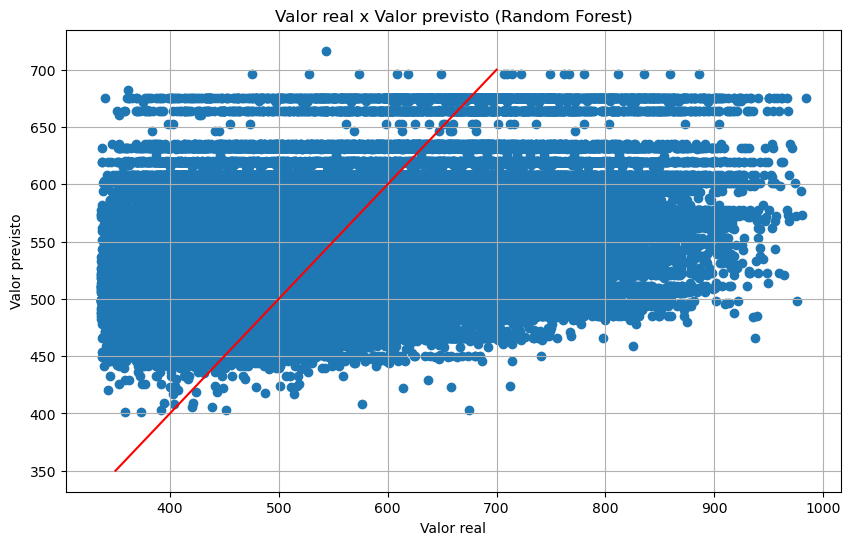

In [181]:
# grafico de dispersão entre os valores reais e os valores previstos

plt.figure(figsize=(10, 6))
plt.scatter(y_RF_test, y_RF_pred)
plt.xlabel('Valor real')
plt.ylabel('Valor previsto')
plt.title('Valor real x Valor previsto (Random Forest)')

# adicionando a linha de tendência no gráfico

plt.plot([350, 700], [350, 700], c='red')
plt.grid()
plt.show()

- Regressão Linear

In [177]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Separando as variáveis entre preditoras e variável alvo

X_RL = dummies_filtrado.drop('NU_NOTA_MT', axis=1)
Y_RL = dummies_filtrado['NU_NOTA_MT']

# Criando os conjuntos de dados de treino e teste
x_RL_treino, x_RL_teste, y_RL_treino, y_RL_teste = train_test_split(X_RL, Y_RL, test_size=0.3)

# Cria o modelo
modelo = LinearRegression()

# Treina o modelo
modelo.fit(x_RL_treino, y_RL_treino)

# Fazendo previsões
y_RL_pred = modelo.predict(x_RL_teste)

# Avaliando o modelo
r2 = r2_score(y_RL_teste, y_RL_pred)
mae = mean_absolute_error(y_RL_teste, y_RL_pred)
mse = mean_squared_error(y_RL_teste, y_RL_pred)
rmse = np.sqrt(mse)

print(f'R²: {r2:.4f}')
print(f'MAE: {mae:.4f}')
print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')


R²: 0.1220
MAE: 86.7137
MSE: 11353.2831
RMSE: 106.5518


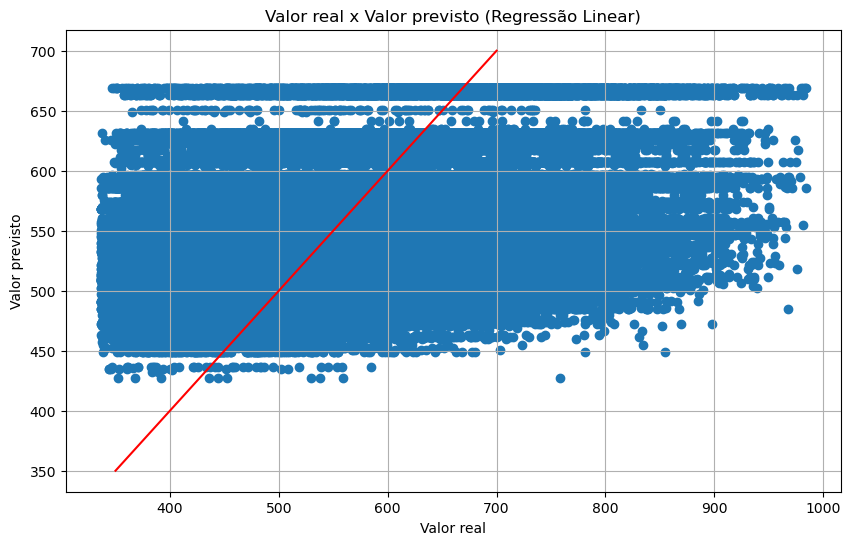

In [182]:
# grafico de dispersão entre os valores reais e os valores previstos

plt.figure(figsize=(10, 6))
plt.scatter(y_RL_teste, y_RL_pred)
plt.xlabel('Valor real')
plt.ylabel('Valor previsto')
plt.title('Valor real x Valor previsto (Regressão Linear)')

# adicionando a linha de tendência no gráfico

plt.plot([350, 700], [350, 700], c='red')
plt.grid()
plt.show()

## Referências:

 - https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados
 - https://stackoverflow.com/questions/15433372/stepwise-regression-in-python

 - https://stackoverflow.com/questions/48071753/selecting-the-best-combination-of-variables-for-regression-model-based-on-reg-sc